# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

**Observação:** Não encontrei o arquivo 'sinasc_RO_2019.csv' para download. Trabalhei com o mesmo arquivo do exercício 2.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib notebook

In [2]:
sinasc = pd.read_csv('sinasc_2019.csv')
print(sinasc.shape)

(27028, 69)


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
sinasc.loc[(sinasc['APGAR5'] >= 8) & (sinasc['APGAR5'] <= 10), 'CATEG_APGAR5'] = 'normal'
sinasc.loc[(sinasc['APGAR5'] >= 6) & (sinasc['APGAR5'] <= 7), 'CATEG_APGAR5'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] >= 4) & (sinasc['APGAR5'] <= 5), 'CATEG_APGAR5'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] >= 0) & (sinasc['APGAR5'] <= 3), 'CATEG_APGAR5'] = 'asfixia grave'

In [4]:
sinasc['CATEG_APGAR5'].value_counts()

normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: CATEG_APGAR5, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [5]:
sinasc['GESTACAO'].unique()

array(['37 a 41 semanas', '42 semanas e mais', '32 a 36 semanas',
       '22 a 27 semanas', '28 a 31 semanas', nan, 'Menos de 22 semanas'],
      dtype=object)

#### 2) Categorização para a variável GESTACAO:

- Menos de 22 semanas: 'G<22'
- 22 a 27 semanas: 'G22<27'
- 28 a 31 semanas: 'G28<31'
- 32 a 36 semanas: 'G32<36'
- 37 a 41 semanas: 'G37<41'
- 42 semanas e mais: 'G>42'

**Fiz essa categorização para ficar melhor de visualizar no eixo X**. Mesmo usando a rotação fica ruim de ler.

In [6]:
sinasc.loc[(sinasc['GESTACAO'] == 'Menos de 22 semanas'), 'CATEG_GESTA'] = 'G<22'
sinasc.loc[(sinasc['GESTACAO'] == '22 a 27 semanas'), 'CATEG_GESTA'] = 'G22<27'
sinasc.loc[(sinasc['GESTACAO'] == '28 a 31 semanas'), 'CATEG_GESTA'] = 'G28<31'
sinasc.loc[(sinasc['GESTACAO'] == '32 a 36 semanas'), 'CATEG_GESTA'] = 'G32<36'
sinasc.loc[(sinasc['GESTACAO'] == '37 a 41 semanas'), 'CATEG_GESTA'] = 'G37<41'
sinasc.loc[(sinasc['GESTACAO'] == '42 semanas e mais'), 'CATEG_GESTA'] = 'G>42'

In [7]:
sinasc['CATEG_GESTA'].value_counts()

G37<41    22589
G32<36     2249
G>42        700
G28<31      165
G22<27       86
G<22          7
Name: CATEG_GESTA, dtype: int64

<IPython.core.display.Javascript object>


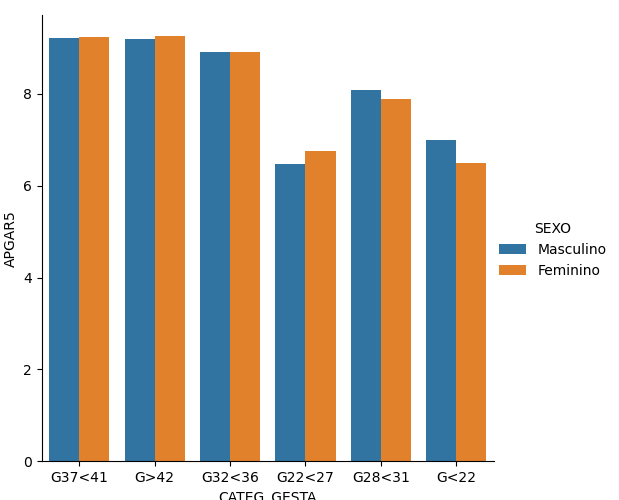

In [8]:
sns.catplot(x='CATEG_GESTA', y='APGAR5'
            , hue = 'SEXO'
            , kind='bar'
            # estimator = sum
            , data=sinasc
            , ci = None
           )

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [9]:
freq = pd.crosstab(sinasc['CATEG_GESTA'], sinasc['APGAR5'])
freq

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
CATEG_GESTA,,,,,,,,,,,
G22<27,7,0,8,6,1,0,2,10,24,19,8
G28<31,0,0,2,1,5,7,7,11,61,55,13
G32<36,2,2,2,2,8,11,17,56,362,1307,465
G37<41,5,20,3,5,7,21,45,151,1417,13565,7284
G<22,1,0,1,0,0,0,0,1,0,3,1
G>42,1,0,0,0,0,1,1,5,44,423,223


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [10]:
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
CATEG_GESTA,,,,,,,,,,,
G22<27,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
G28<31,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
G32<36,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
G37<41,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
G<22,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857
G>42,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<IPython.core.display.Javascript object>


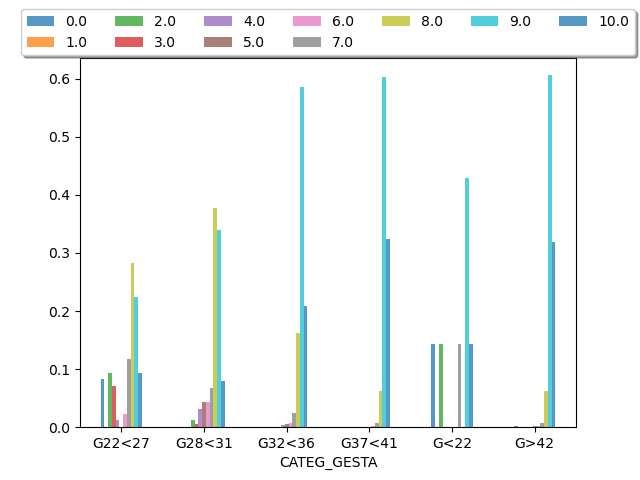

In [11]:
freq_pctlin.plot(kind='bar',alpha=0.75, rot=0).legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
                                                     ncol=7, fancybox=True, shadow=True)


**APGAR5:** Baseado nesse conjunto de dados, os eventos abaixo da classificação 8 começam a ser mais frequentes,
    mostrando claramente que os riscos de asfixia aumenta consideravelmente nos partes com menos de 37 semanas.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [12]:
sinasc['PESO_KG'] = (sinasc['PESO'] / 1000)

In [13]:
freq2 = pd.crosstab(sinasc['PESO_KG'], sinasc['APGAR5'])
freq2

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
PESO_KG,,,,,,,,,,,
0.258,0,0,0,0,0,0,0,0,0,1,0
0.285,0,0,0,0,0,0,0,0,0,0,1
0.292,0,0,0,0,0,0,0,0,0,1,0
0.295,0,0,0,0,0,0,0,0,0,1,0
0.305,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5.190,0,0,0,0,0,0,0,0,0,1,0
5.470,0,0,0,0,0,0,0,0,0,1,0
5.480,0,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>


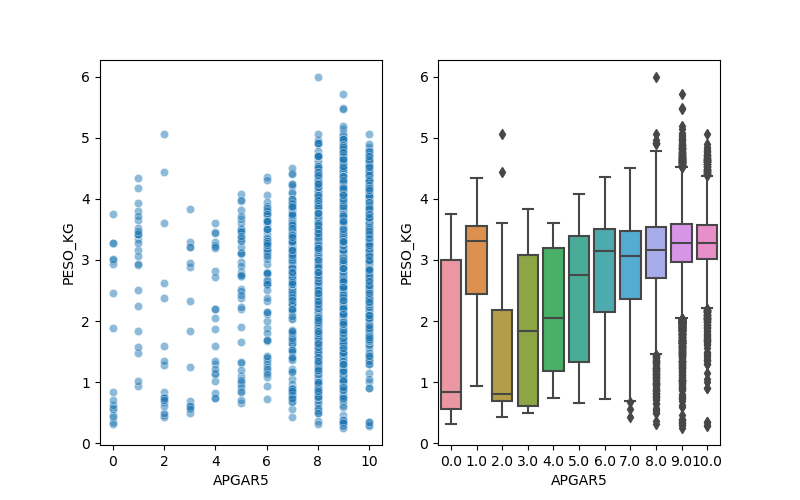

<AxesSubplot:xlabel='APGAR5', ylabel='PESO_KG'>

In [29]:
plt.close('all')
plt.rc('figure', figsize=(8, 5))
fig, axes = plt.subplots(1, 2)

sns.scatterplot(ax = axes[0],
                x = 'APGAR5'
                , y = 'PESO_KG'
                , data = sinasc
                , alpha = .5
                #, hue = 'species'
                #, size = 'body_mass_g'
               )

sns.boxplot(ax = axes[1], data = sinasc, y="PESO_KG", x="APGAR5", orient="v")

### PESO X APGAR5

Utilizando os gráficos de **dispersão e boxplot**, a relação que se pode observar entre peso e apgar5 é que os valores mais altos e seguros de APGAR5 ocorrem em bebês com variação pequena de peso. Possivelmente isto está associado a questão desses bebês estarem numa fase de gestação mais avançada e melhor formados. Os índices de apgar5 mais críticos ocorrem justamente numa faixa onde há uma variação muito grande de peso dos bebês em fases muito diferentes de gestação.

